In [1]:
import pandas as pd

df = pd.read_csv('results.tsv', delim_whitespace=True, header=0)
df.head()

,1369167,0.15873015873015872,0.17777777777777778,0.15277777777777776,0.13095238095238096,0.11428571428571428,0.20833333333333334,0.09523809523809523,0.15,0.16666666666666666,...,0.19444444444444442,0.6666666666666666.1,0.5,0.6666666666666666.2,0.5.1,0.27777777777777773,0.6666666666666666.3,0.2222222222222222,0.16666666666666666.1,0.20370370370370372
0,3362990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3614799,0.191667,0.402778,0.402778,0.406250,0.406250,0.281250,0.319444,0.184028,0.358333,...,0.583333,0.750000,0.531250,0.341667,0.525000,0.550000,0.402778,0.416667,0.402778,0.364583
2,1196769,0.158995,0.611111,0.750000,0.625000,0.666667,0.597222,0.722222,0.307143,0.533333,...,0.666667,0.666667,0.666667,0.750000,0.625000,0.638889,0.638889,0.722222,0.666667,0.638889
3,1469522,0.304762,0.706349,0.778571,0.678571,0.674603,0.579762,0.179762,0.263492,0.174546,...,0.767857,0.589286,0.689286,0.603571,0.423810,0.748016,0.432143,0.638265,0.415873,0.490873
4,1499659,0.268376,0.660256,0.602564,0.544872,0.615385,0.557692,0.336325,0.318803,0.098077,...,0.661538,0.638462,0.679487,0.700855,0.635897,0.497436,0.648718,0.495604,0.584615,0.523932


In [2]:
import matplotlib.pyplot as plt
import tikzplotlib

# [FIX] AttributeError: 'Line2D' object has no attribute '_us_dashSeq'

from matplotlib.lines import Line2D
from matplotlib.legend import Legend
Line2D._us_dashSeq    = property(lambda self: self._dash_pattern[1])
Line2D._us_dashOffset = property(lambda self: self._dash_pattern[0])
Legend._ncol = property(lambda self: self._ncols, lambda self, value: setattr(self, "_ncols", value))

# [FIX] AttributeError: 'Legend' object has no attribute '_ncol'
    
def tikzplotlib_fix_ncols(obj):
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    if hasattr(obj, 'gcf'):
        fig = obj.gcf()
        for ax in fig.get_axes():
            if hasattr(ax, 'legend_') and ax.legend_ is not None:
                if hasattr(ax.legend_, "_ncols"):
                    ax.legend_._ncol = ax.legend_._ncols
    else:
        for child in obj.get_children():
            tikzplotlib_fix_ncols(child)


Number of unique users in the dataset: 132
Mean ± Variance of MRR-C for each Poison level:
  Poison         result
0     0%  0.621 ± 0.015
1    10%  0.608 ± 0.017
3    20%  0.593 ± 0.015
4    50%  0.342 ± 0.013
5    80%  0.169 ± 0.003
2   100%  0.159 ± 0.003


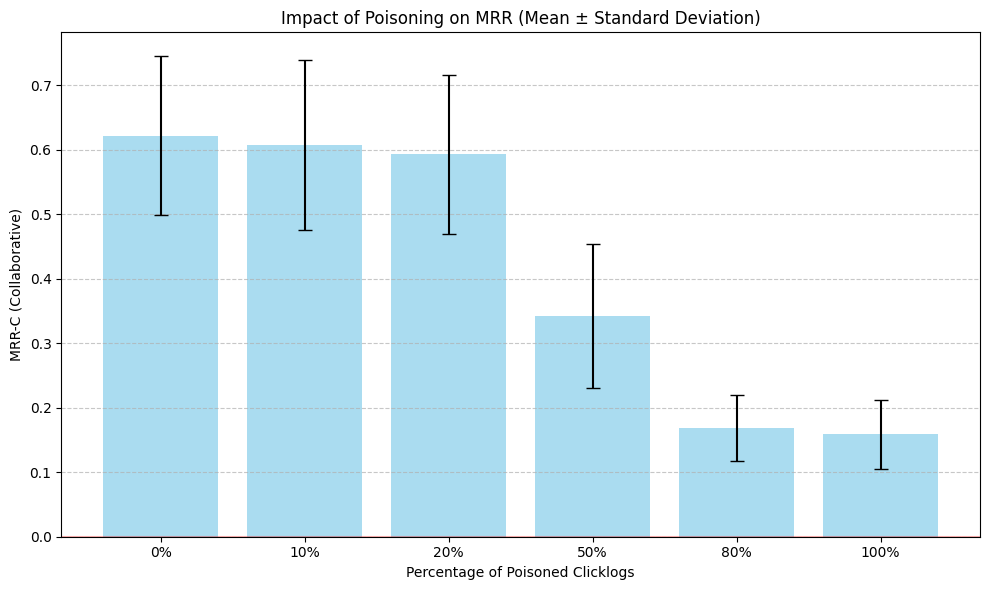

In [37]:
# Group by Poison level and calculate mean and variance of MRR-C
poison_stats = df.groupby('Poison')['MRR-C'].agg(['mean', 'var']).reset_index()

# Define the order for poison levels
poison_order = ['0%', '10%', '20%', '50%', '80%', '100%']

# Sort the dataframe according to the defined order
poison_stats['Poison'] = pd.Categorical(poison_stats['Poison'], categories=poison_order, ordered=True)
poison_stats = poison_stats.sort_values('Poison')

# Format the results as mean ± variance
poison_stats['result'] = poison_stats['mean'].round(3).astype(str) + ' ± ' + poison_stats['var'].round(3).astype(str)

# Count the number of unique users in the dataset
num_users = df['UserID'].nunique()
print(f"Number of unique users in the dataset: {num_users}")


# Display the results
print("Mean ± Variance of MRR-C for each Poison level:")
print(poison_stats[['Poison', 'result']])

# Create a bar plot to visualize the results
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
bars = plt.bar(poison_stats['Poison'], poison_stats['mean'], yerr=np.sqrt(poison_stats['var']), 
               capsize=5, alpha=0.7, color='skyblue')

plt.title('Impact of Poisoning on MRR (Mean ± Standard Deviation)')
plt.xlabel('Percentage of Poisoned Clicklogs')
plt.ylabel('MRR-C (Collaborative)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.tight_layout()


plt.tight_layout()
tikzplotlib_fix_ncols(plt)
tikzplotlib.save("poison_impact_plot.tex", axis_width=r'\columnwidth', axis_height=r'6cm')



In [34]:
# Calculate mean and standard deviation for specified columns grouped by Poison level
columns_to_analyze = ['MRR-C', 'Δ-C']

# Define the order for poison levels
poison_order = ['0%', '10%', '20%', '50%', '80%', '100%']

# Calculate mean for each poison level
mean_stats = df.groupby(['Poison'])[columns_to_analyze].mean().reset_index()
mean_stats['Poison'] = pd.Categorical(mean_stats['Poison'], categories=poison_order, ordered=True)
mean_stats = mean_stats.sort_values('Poison')

# Calculate standard deviation for each poison level
std_stats = df.groupby(['Poison'])[columns_to_analyze].std().reset_index()
std_stats['Poison'] = pd.Categorical(std_stats['Poison'], categories=poison_order, ordered=True)
std_stats = std_stats.sort_values('Poison')

# Create a formatted table with mean ± std
result_stats = mean_stats.copy()
for col in columns_to_analyze:
    result_stats[col] = mean_stats[col].apply(lambda x: f"{x:.3f}").astype(str) + ' ± ' + std_stats[col].apply(lambda x: f"{x:.3f}").astype(str)

# Display the results with mean ± standard deviation
result_stats

,Poison,MRR-C,Δ-C
0,0%,0.633 ± 0.120,0.150 ± 0.143
1,10%,0.621 ± 0.130,0.137 ± 0.153
3,20%,0.604 ± 0.123,0.120 ± 0.140
4,50%,0.342 ± 0.117,-0.141 ± 0.180
5,80%,0.167 ± 0.050,-0.316 ± 0.165
2,100%,0.157 ± 0.052,-0.326 ± 0.174


In [44]:
# Load the semantica vs random comparison data
semantica_vs_random = pd.read_csv('semantica_vs_random.tsv', delim_whitespace=True, header=0)

# Display the first few rows to verify the data
print("Semantica vs Random Comparison Data:")
semantica_vs_random.head()

# Calculate summary statistics
summary_stats = semantica_vs_random.describe()

# Calculate mean and standard deviation for each MRR type
mrr_columns = ['MRR-L', 'MRR-R', 'MRR-S']
mrr_stats = {
    'Mean': semantica_vs_random[mrr_columns].mean(),
    'Std': semantica_vs_random[mrr_columns].std()
}

# Create a DataFrame for the statistics
mrr_stats_df = pd.DataFrame(mrr_stats)
print("\nMRR Statistics (Mean ± Std):")
for col in mrr_columns:
    print(f"{col}: {mrr_stats_df.loc[col, 'Mean']:.3f} ± {mrr_stats_df.loc[col, 'Std']:.3f}")


Semantica vs Random Comparison Data:

MRR Statistics (Mean ± Std):
MRR-L: 0.465 ± 0.133
MRR-R: 0.627 ± 0.123
MRR-S: 0.625 ± 0.128


In [1]:
# Load the AOL dataset document file
import pandas as pd
import json
from pathlib import Path

# Define the path to the AOL dataset document file
file_path = '/Users/marcel/Documents/Tribler Datasets/.ir_datasets/aol-ia/downloaded_docs/0.jsonl'

# Check if the file exists
if Path(file_path).exists():
    # Read the JSONL file line by line
    docs = []
    with open(file_path, 'r') as f:
        for line in f:
            try:
                docs.append(json.loads(line))
            except json.JSONDecodeError:
                print(f"Error decoding JSON line: {line}")
    
    # Convert to DataFrame
    docs_df = pd.DataFrame(docs)
    
    # Display information about the loaded data
    print(f"Loaded {len(docs_df)} documents from AOL dataset")
    print("\nDataFrame columns:")
    print(docs_df.columns.tolist())
    
    # Display the first few rows
    print("\nFirst 5 rows:")
    display(docs_df.head())
    
    # Display basic statistics
    print("\nBasic statistics:")
    if 'body' in docs_df.columns:
        docs_df['body_length'] = docs_df['body'].apply(lambda x: len(x) if isinstance(x, str) else 0)
        print(f"Average document length: {docs_df['body_length'].mean():.2f} characters")
    
    # Count missing values
    print("\nMissing values per column:")
    print(docs_df.isna().sum())
else:
    print(f"File not found: {file_path}")
    print("Please check the path and make sure the file exists.")


Loaded 95362 documents from AOL dataset

DataFrame columns:
['doc_id', 'url', 'wb_url', 'title', 'text']

First 5 rows:


,doc_id,url,wb_url,title,text
0,078c6229933e,http://www.fasteningproducts.net,https://web.archive.org/web/20060110225946/htt...,Home,Welcome to Fastening Products of LancasterFast...
1,0585fcd2de12,http://www.maseratidealers.com,https://web.archive.org/web/20060409061055/htt...,Maserati,
2,052d3ed297c5,http://www.thing-e.info,https://web.archive.org/web/20140106112103/htt...,,
3,01fce9745047,http://www.eides.com,https://web.archive.org/web/20060403005852/htt...,Eide 's Entertainment,WELCOME TO EIDE 'S ENTERTAINMENT Your complete...
4,06994876352a,http://xzpooping.splinder.com,https://web.archive.org/web/20060206163029/htt...,"-=E Pooping PORN - women , pants anal girl and...",pooping mpegs pooping pants scat bitch xxx fre...



Basic statistics:

Missing values per column:
doc_id    0
url       0
wb_url    0
title     0
text      0
dtype: int64


In [2]:
# Calculate word count statistics for the text column
if 'text' in docs_df.columns:
    # Count words in each document
    docs_df['word_count'] = docs_df['text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
    
    # Calculate statistics
    max_words = docs_df['word_count'].max()
    avg_words = docs_df['word_count'].mean()
    median_words = docs_df['word_count'].median()
    
    # Display results
    print("\nWord count statistics for 'text' column:")
    print(f"Maximum word count: {max_words}")
    print(f"Average word count: {avg_words:.2f}")
    print(f"Median word count: {median_words}")
    
    # Show distribution of word counts
    print("\nWord count distribution:")
    print(docs_df['word_count'].describe())
    
    # Find the document with the maximum word count
    max_word_doc = docs_df.loc[docs_df['word_count'].idxmax()]
    print("\nDocument with maximum word count:")
    print(f"Document ID: {max_word_doc.get('doc_id', 'N/A')}")
    print(f"URL: {max_word_doc.get('url', 'N/A')}")
    print(f"Title: {max_word_doc.get('title', 'N/A')}")
else:
    print("\nNo 'text' column found in the dataset.")



Word count statistics for 'text' column:
Maximum word count: 226523
Average word count: 602.43
Median word count: 223.0

Word count distribution:
count     95362.000000
mean        602.428294
std        2799.350831
min           0.000000
25%          54.000000
50%         223.000000
75%         511.000000
max      226523.000000
Name: word_count, dtype: float64

Document with maximum word count:
Document ID: 0a3019944ff7
URL: http://thisdayinhistory.blogspot.com
Title: This Day in History


In [10]:
import pandas as pd

# Load the data
df = pd.read_csv('some_results.tsv', delim_whitespace=True, header=0)

# Define the columns to analyze
mrr_columns = ['MRR-L', 'MRR-R', 'MRR-S']

# Calculate mean and standard deviation
means = df[mrr_columns].mean()
stds = df[mrr_columns].std()

# Print results
print("MRR Statistics (Mean ± Std):")
for col in mrr_columns:
    print(f"{col}: {means[col]:.3f} ± {stds[col]:.3f}")

MRR Statistics (Mean ± Std):
MRR-L: 0.525 ± 0.068
MRR-R: 0.375 ± 0.128
MRR-S: 0.376 ± 0.107


In [11]:
import pandas as pd
import numpy as np

# Load the user embeddings data
user_embeddings_df = pd.read_csv('semantica/semantica_tree_user_embeddings.csv', index_col=0)

print(user_embeddings_df.head())


    AnonID                                          embedding
0  4071847  [ 7.44519755e-03 -3.33327875e-02  2.94009950e-...
1  3052241  [-1.30685195e-02 -3.08464132e-02  2.03749221e-...
2  1523743  [ 9.20531247e-03 -3.41259651e-02  3.17560025e-...
3  5926042  [ 4.70411032e-03 -2.31376663e-02  3.36696580e-...
4  1747127  [-3.42316995e-03 -2.58689430e-02  2.53010374e-...


In [ ]:
import pandas as pd
import numpy as np
import re
import lmdb
import pickle
import os

# Load the user embeddings data
user_embeddings_df = pd.read_csv('semantica/semantica_tree_user_embeddings.csv', index_col=0)

# Create LMDB environment
db_path = 'user_embeddings.lmdb'
map_size = 10 * 1024 * 1024 * 1024  # 10GB should be enough for user embeddings

# Open the database
env = lmdb.open(db_path, map_size=map_size)

# Process all user embeddings and store them in the database
with env.begin(write=True) as txn:
    for index, row in user_embeddings_df.iterrows():
        user_id = row['AnonID']
        embedding_str = row['embedding']
        
        # Clean the string and convert to numpy array
        clean_str = embedding_str.strip('[]')
        values = re.split(r'\s+', clean_str)
        embedding_array = np.array([float(val) for val in values if val])
        
        # Store the embedding in the database
        txn.put(str(user_id).encode(), pickle.dumps(embedding_array))

# Close the environment
env.close()

print(f"Successfully created LMDB database at {db_path}")
print(f"Total users processed: {len(user_embeddings_df)}")

Successfully created LMDB database at user_embeddings.lmdb
Total users processed: 19240

Error retrieving sample user: name 'doc_id' is not defined


In [1]:
# Verify by retrieving a sample user
sample_user_id = 1523743
from utils.db import get_user_embedding

try:
    sample_embedding = get_user_embedding(sample_user_id)
    if sample_embedding is not None:
        print(f"\nVerification for user {sample_user_id}:")
        print(f"Embedding shape: {sample_embedding.shape}")
        print(f"First few values: {sample_embedding[:5]}")
    else:
        print(f"\nUser {sample_user_id} not found in the database.")
except Exception as e:
    print(f"\nError retrieving sample user: {e}")



Verification for user 1523743:
Embedding shape: (768,)
First few values: [ 0.00920531 -0.03412597  0.031756    0.02844471  0.00627908]


In [2]:
from datasets.aol4ps import load_dataset

df, _, _ = load_dataset('aol4ps')

df.head()

,AnonID,QueryIndex,QueryTime,SessionNo,DataType,DocIndex,CandiList,ClickPos
632114,2420729,q-218577,2006-03-01 00:02:05,452138,0,d-6293,d-373522\td-284542\td-278851\td-866048\td-6842...,5
183427,713071,q-70157,2006-03-01 00:02:25,131654,0,d-26656,d-469101\td-325736\td-52859\td-125305\td-60369...,5
221168,861363,q-83973,2006-03-01 00:02:42,158371,0,d-257724,d-479809\td-169720\td-309620\td-118537\td-4432...,5
558208,2126555,q-1092,2006-03-01 00:03:05,398884,0,d-2028,d-557711\td-20622\td-42821\td-290010\td-938913...,5
183428,713071,q-70158,2006-03-01 00:03:15,131654,0,d-28296,d-906561\td-158539\td-244003\td-358791\td-1252...,5


In [4]:
df['ClickPos'].value_counts()

5    239436
0    111215
1     38546
2     21179
3     15052
4     10634
6      7313
7      6424
8      5621
9      5250
Name: ClickPos, dtype: int64

In [8]:
import numpy as np

df['ReciprocalRank'] = 1 / (df['ClickPos'] + 1)
mean_reciprocal_rank = df['ReciprocalRank'].mean()

print(f"BM25 MRR: {mean_reciprocal_rank:.4f}")
print("Random MRR: ", np.mean([1 / i for i in range(1, 11)]))
print("Worst case MRR: ", 1 / 10)

BM25 MRR: 0.4045
Random MRR:  0.2928968253968254
Worst case MRR:  0.1


# Semantica Sanity Check

In [1]:
from datasets.aol4ps import load_dataset
from utils.db import get_doc_embedding
from semantica.graph import get_neighbors
import random
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a, b):
    """Calculate cosine similarity between vectors a and b, handling any array shape."""
    a_flat = np.ravel(a)
    b_flat = np.ravel(b)
    
    if norm(a_flat) == 0 or norm(b_flat) == 0:
        return 0.0
    
    return float(dot(a_flat, b_flat)/(norm(a_flat)*norm(b_flat)))

df, queries_df, docs_df = load_dataset('AOL4PS')
all_users = df['AnonID'].unique()

def get_user_embedding(user_id):
    doc_ids = df[df['AnonID'] == user_id]['DocIndex'].unique()
    embeddings = [get_doc_embedding(doc_id) for doc_id in doc_ids]
    embeddings = [emb for emb in embeddings if emb is not None]
    return np.mean(embeddings, axis=0)

for user_id in all_users:
    user_emb = get_user_embedding(user_id)
    if len(get_neighbors(user_id)) == 0:
        continue

    semantica_neighbors_avg_emb = np.mean([get_user_embedding(neighbor) for neighbor in get_neighbors(user_id)], axis=0)
    random_neighbors_avg_emb = np.mean([get_user_embedding(neighbor) for neighbor in random.sample(list(all_users), len(get_neighbors(user_id)))], axis=0)

    semantic_similarity = cosine_similarity(user_emb, semantica_neighbors_avg_emb)
    random_similarity = cosine_similarity(user_emb, random_neighbors_avg_emb)

    print(f"User={user_id}, N={len(get_neighbors(user_id))}, \tSemantica neighborhood similarity: {semantic_similarity:.3f}, Random neighborhood similarity: {float(random_similarity):.3f}")


/Users/marcel/anaconda3/envs/decpy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/marcel/anaconda3/envs/decpy/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/marcel/anaconda3/envs/decpy/lib/python3.9/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


User=2420729, N=75, 	Semantica neighborhood similarity: nan, Random neighborhood similarity: 0.988
User=713071, N=41, 	Semantica neighborhood similarity: 0.998, Random neighborhood similarity: 0.997
User=861363, N=91, 	Semantica neighborhood similarity: 0.990, Random neighborhood similarity: 0.988
User=2126555, N=38, 	Semantica neighborhood similarity: 0.995, Random neighborhood similarity: 0.994
User=461601, N=49, 	Semantica neighborhood similarity: nan, Random neighborhood similarity: 0.983
User=556178, N=29, 	Semantica neighborhood similarity: 0.998, Random neighborhood similarity: 0.996
User=3013856, N=29, 	Semantica neighborhood similarity: 0.996, Random neighborhood similarity: 0.994
User=1662860, N=42, 	Semantica neighborhood similarity: 0.996, Random neighborhood similarity: 0.993
User=275721, N=33, 	Semantica neighborhood similarity: nan, Random neighborhood similarity: 0.956
User=908731, N=35, 	Semantica neighborhood similarity: 0.998, Random neighborhood similarity: 0.995
Us

KeyboardInterrupt: 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the poisoning results from TSV file
poison_results = pd.read_csv('results.tsv', sep='\t', header=None)
poison_results.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1369167,0.158730,0.177778,0.152778,0.130952,0.114286,0.208333,0.095238,0.150000,0.166667,...,0.194444,0.666667,0.500000,0.666667,0.50000,0.277778,0.666667,0.222222,0.166667,0.203704
1,3362990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3614799,0.191667,0.402778,0.402778,0.406250,0.406250,0.281250,0.319444,0.184028,0.358333,...,0.583333,0.750000,0.531250,0.341667,0.52500,0.550000,0.402778,0.416667,0.402778,0.364583
3,1196769,0.158995,0.611111,0.750000,0.625000,0.666667,0.597222,0.722222,0.307143,0.533333,...,0.666667,0.666667,0.666667,0.750000,0.62500,0.638889,0.638889,0.722222,0.666667,0.638889
4,1469522,0.304762,0.706349,0.778571,0.678571,0.674603,0.579762,0.179762,0.263492,0.174546,...,0.767857,0.589286,0.689286,0.603571,0.42381,0.748016,0.432143,0.638265,0.415873,0.490873


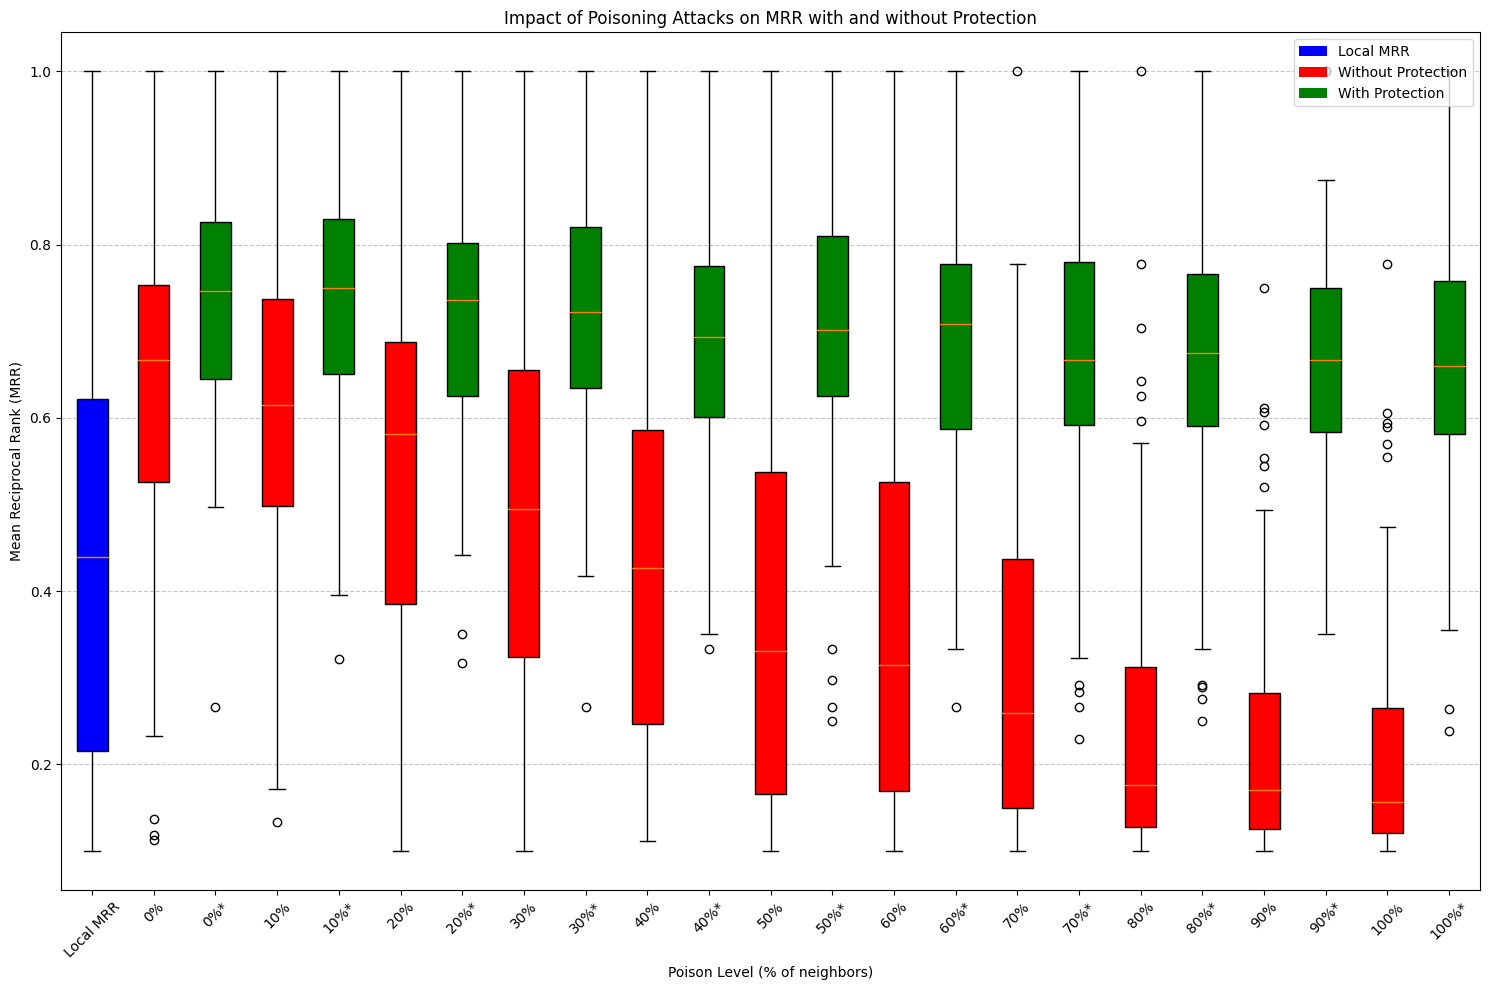

In [40]:
# Create a boxplot figure showing MRR values with paired comparisons
plt.figure(figsize=(15, 10))

# Define columns to use
local_mrr = poison_results[1]  # Local MRR (column 2)
poison_levels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Poison percentages

# Prepare data for boxplot
data_to_plot = []
labels = []

# Add local MRR as the first boxplot
data_to_plot.append(local_mrr)
labels.append('Local MRR')

# Add paired data for each poison level
for i in range(len(poison_levels)):
    # Column indices for regular and protected versions (pairs)
    regular_col = i + 2  # Starting from column 3 (index 2)
    protected_col = i + 13  # Starting from column 14 (index 13)
    
    # Add regular version (red)
    data_to_plot.append(poison_results[regular_col])
    labels.append(f'{poison_levels[i]}%')
    
    # Add protected version (green)
    data_to_plot.append(poison_results[protected_col])
    labels.append(f'{poison_levels[i]}%*')

# Create boxplot
box = plt.boxplot(data_to_plot, patch_artist=True, labels=labels)

# Set colors for boxplots
colors = ['blue']  # Local MRR in blue
for i in range(1, len(data_to_plot)):
    if i % 2 == 1:  # Regular versions (odd indices after the first)
        colors.append('red')
    else:  # Protected versions (even indices after the first)
        colors.append('green')

# Apply colors to boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set labels and title
plt.xlabel('Poison Level (% of neighbors)')
plt.ylabel('Mean Reciprocal Rank (MRR)')
plt.title('Impact of Poisoning Attacks on MRR with and without Protection')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', label='Local MRR'),
    Patch(facecolor='red', label='Without Protection'),
    Patch(facecolor='green', label='With Protection')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()


,Col 24,Col 25,Col 26,Col 27,Col 28,Col 29,Col 30,Col 31,Col 32,Col 33,Col 34
Mean,2.140351,2.114035,2.043860,1.938596,1.877193,1.885965,1.807018,1.763158,1.631579,1.464912,1.605263
Min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,6.000000,6.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,4.000000,4.000000,5.000000
Std,1.342809,1.474015,1.332974,1.278031,1.270080,1.355153,1.240020,1.162105,1.099180,1.040591,1.149208


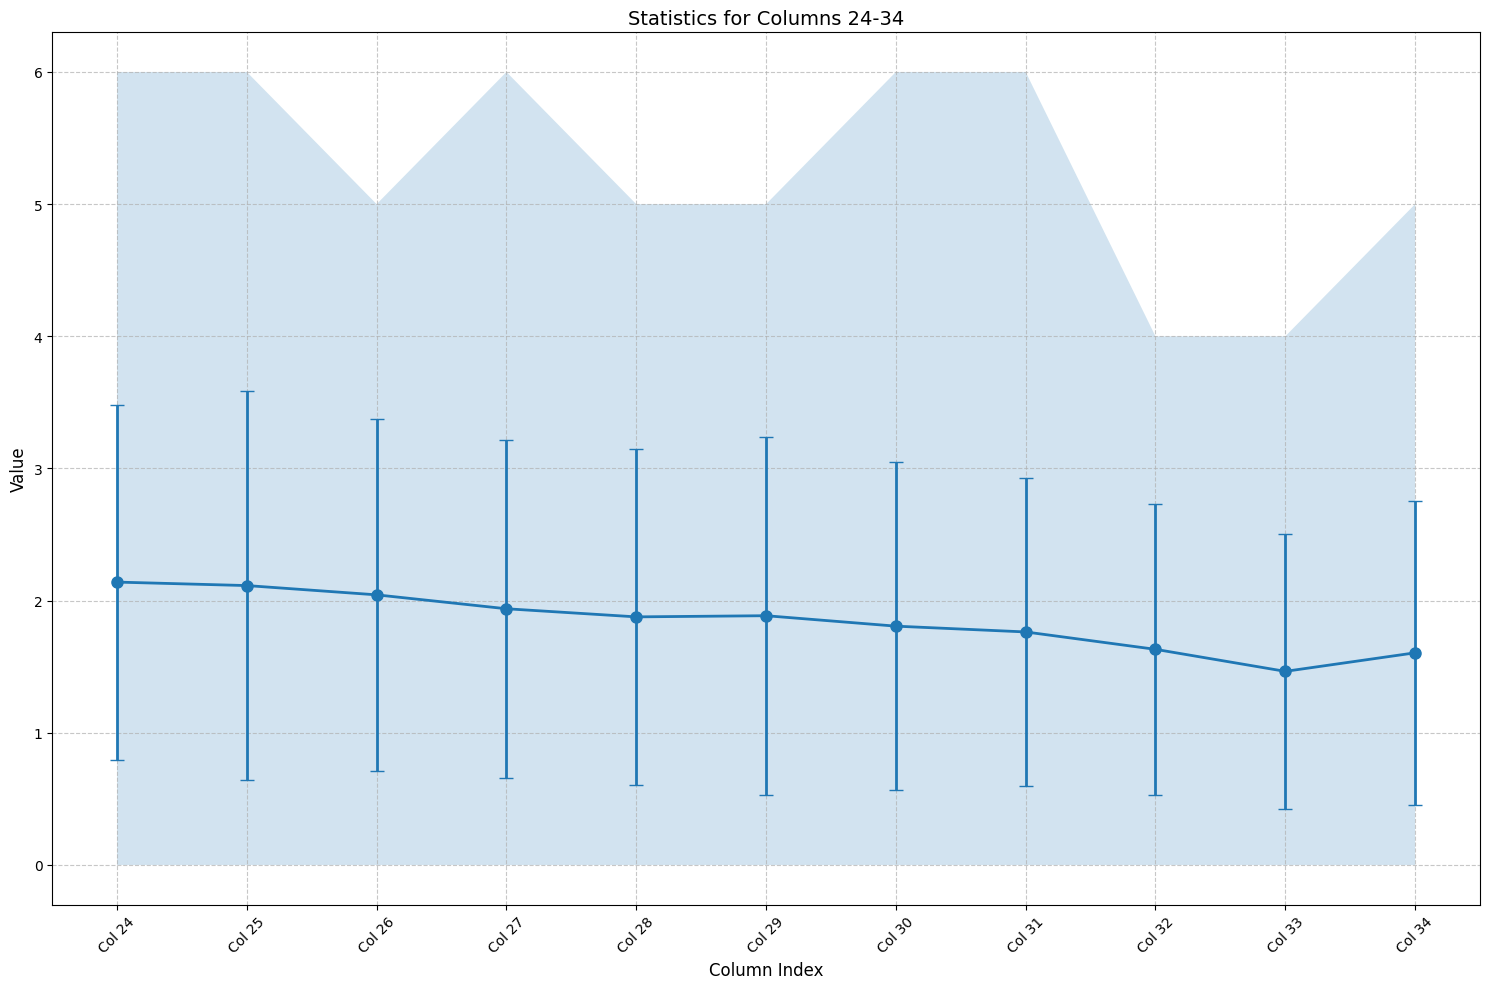

In [43]:
# Calculate statistics for columns 24-34
import pandas as pd
import numpy as np

# Assuming poison_results is a DataFrame with the results
# Extract columns 24-34 (using 0-based indexing, so columns 24-34 are indices 24-34)
cols_to_analyze = list(range(24, 35))  # 24 to 34 inclusive

# Create a DataFrame to store the statistics
stats_df = pd.DataFrame(index=['Mean', 'Min', 'Max', 'Std'])

# Calculate statistics for each column
for col in cols_to_analyze:
    if col in poison_results.columns:
        col_stats = {
            'Mean': poison_results[col].mean(),
            'Min': poison_results[col].min(),
            'Max': poison_results[col].max(),
            'Std': poison_results[col].std()
        }
        stats_df[f'Col {col}'] = pd.Series(col_stats)

# Display the statistics table
display(stats_df)

# Create a visualization of these statistics
plt.figure(figsize=(15, 10))

# Plot mean values with error bars showing standard deviation
x = np.arange(len(cols_to_analyze))
means = [stats_df[f'Col {col}']['Mean'] for col in cols_to_analyze if f'Col {col}' in stats_df.columns]
stds = [stats_df[f'Col {col}']['Std'] for col in cols_to_analyze if f'Col {col}' in stats_df.columns]

plt.errorbar(x, means, yerr=stds, fmt='o-', capsize=5, linewidth=2, markersize=8)

# Add min and max as a shaded region
mins = [stats_df[f'Col {col}']['Min'] for col in cols_to_analyze if f'Col {col}' in stats_df.columns]
maxs = [stats_df[f'Col {col}']['Max'] for col in cols_to_analyze if f'Col {col}' in stats_df.columns]
plt.fill_between(x, mins, maxs, alpha=0.2)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Column Index', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Statistics for Columns 24-34', fontsize=14)
plt.xticks(x, [f'Col {col}' for col in cols_to_analyze if f'Col {col}' in stats_df.columns], rotation=45)

plt.tight_layout()
plt.show()


In [134]:
def fixed_window(items, target_index, window_size):
    assert target_index < len(items) and target_index >= 0
    half_window = window_size // 2

    # Ensure the window does not go out of bounds
    start_index = max(0, target_index - half_window)
    end_index = min(len(items), target_index + half_window)

    # If target is close to bounds, extend the window to ensure window_size is met
    if target_index < half_window:
        end_index += half_window - target_index
    if target_index + half_window > len(items):
        start_index -= target_index + half_window - len(items)

    return items[start_index:end_index]

items = list(range(100))
assert fixed_window(items, 50, 10) == [45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
assert fixed_window(items, 5, 10) == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
assert fixed_window(items, 4, 10) == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
assert fixed_window(items, 0, 10) == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
assert fixed_window(items, 90, 10) == [85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
assert fixed_window(items, 97, 10) == [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
assert fixed_window(items, 99, 10) == [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

fixed_window(items, 20, 10)

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [6]:
shard = 2

for i in range(100):
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90


In [1]:
import random
import torch
import numpy as np
from autonomos.dart.utils import split_by_qids, compute_feature_stats
from allrank.config import Config
from autonomos.dart.rank import evaluate
from autonomos.utils.data import compile_clickthrough_records
from autonomos.utils.cache import Cache
from autonomos.semantica.graph import get_neighbors
from autonomos.utils.db import get_ctrs
from autonomos.utils.attack import poison_ctrs, flip_label, rand_ctr
from autonomos.dart.utils import ClickThroughRecord
from autonomos.dart.types import Dataset
from autonomos.datasets.aol import load_dataset
from argparse import ArgumentParser
from random import sample
import sys

cache = Cache()
config = Config.from_json("./allRank_config.json")
feature_means = cache.get("feature_means")
feature_stds = cache.get("feature_stds")

In [2]:
ctrs = get_ctrs('3362990')
user_ds = split_by_qids(ctrs, context_ratio=0.8)

# Evaluate local performance
n_l = len(user_ds.context)
mrr_l = evaluate(config, user_ds, feature_means, feature_stds)

[0.0, 0.0, 0.0]
.tmp/7e3d471ea7274579b3370fa9ed94b418


In [3]:
from autonomos.dart.rank import Model

dart = Model(config)
config.data.path = './.tmp/8a9d1d10d71548759f914bf8494fe445/_normalized'
dart.train()
res = dart.test()

[0.0, 0.0, 0.0]


In [7]:
res

0.0

In [4]:
import ir_datasets

dataset = ir_datasets.load("aol-ia")

for qlog in dataset.qlogs_iter():
    if len(qlog.items) != 0:
        assert qlog.items[0].clicked == True

In [12]:

import ir_datasets

dataset = ir_datasets.load("aol-ia")
docs_store = dataset.docs_store()

docs_store.get('967858da90e2')

AolIaDoc(doc_id='967858da90e2', title='Quilting Adventures - Richmond , Virginia', text="Dumbarton Square Shopping Center 7121 Staples Mill Road Richmond , VA 23228 804-262-0005 Mon 10-6 ; Tues-Fri 10-8 ; Sat 10-5 ; Sun 1-4 Shop Blog Map and Directions February 2006 Calendar March 2006 Calendar April 2006 Calendar May 2006 Calendar Classes - Jan to May 2006 Newsletter Links Home Block of the Month Clubs starting ! * Hydrangea Lights BOM will be starting in Feburary . The sample is done and hanging in the shop . Sign up now , as kits are limited . * Calling Me Home BOM will be February through September . You will have the option of siging up for individual blocks or the whole quilt ! Kits will be limited on this one , too , so please reserve the blocks you want now . * The Harvest Spice BOM will run March-December . The number of kits are limited . We are starting a Cloth Doll Club at the shop , meeting the second Wednesday of every month at 6PM . And do n't forget about our free demos

In [23]:
import lmdb
import pickle

db = lmdb.open('data/ctrs.lmdb', map_size=2**32)
with db.begin() as txn:
    # Get the CTRs for user_id 3426571
    # Get all keys in the database
    cursor = txn.cursor()
    keys = []
    if cursor.first():
        while True:
            key = cursor.key().decode()
            keys.append(key)
            if not cursor.next():
                break
    print(f"Total keys in database: {len(keys)}")
    print("Sample keys:", keys[:10] if len(keys) > 10 else keys)
    
    # Try to get CTRs for user_id 3426571
    ctrs = pickle.loads(txn.get(str(3426571).encode())) if txn.get(str(3426571).encode()) else []

Total keys in database: 195989
Sample keys: ['1000004', '10000043', '10000063', '10000272', '1000037', '10000382', '10000416', '1000056', '10000705', '10000737']


In [26]:
# Save all keys to a text file
with open('lmdb_keys.txt', 'w') as f:
    for key in keys:
        f.write(f"{key}\n")

print(f"Saved {len(keys)} keys to lmdb_keys.txt")


Saved 195989 keys to lmdb_keys.txt


In [28]:
from autonomos.datasets.aol import load_dataset
df = load_dataset()

len(df['user_id'].unique())

213806

In [29]:
213806/12

17817.166666666668

In [30]:
213806-195989

17817

In [36]:
unique_users = sorted(df['user_id'].unique())

job_count = 12

all_user_ids = []
for job_id in range(job_count):
    print(job_id)
    user_ids = [u for i, u in enumerate(unique_users) if job_id is None or i % job_count == job_id]
    count = 0
    for user_id in user_ids:
        count += str(user_id) in keys
    print(count, '/', len(user_ids))




0
17818 / 17818
1
17818 / 17818
2
0 / 17817
3
17817 / 17817
4
17817 / 17817
5
17817 / 17817
6
17817 / 17817
7
17817 / 17817
8
17817 / 17817
9
17817 / 17817
10
17817 / 17817
11
17817 / 17817
